# Predicting Credit Card Default Risk
---
by [Olabanji Olaniyan](https://www.linkedin.com/in/olabanji-olaniyan-data-analyst)

**1. Problem Statement**
<p style="text-align: justify;">
The growing need for consumers to assess crucial opportunities, such as education and housing, has led them to look at financial institutions for credit cards to finance these endeavours. 
However, the approval of credit card loans for consumers carries the risk of financial losses due to non-payment or late repayment. In contrast, it also results in profits if more consumers repay their loans. The major challenge for these institutions is to award as many loans as possible to non-defaulters and fewer loans to defaulters. Consequently, the goal of this classification task depends on the institution's risk tolerance. 
</p>

**2. Dataset**
<p style="text-align: justify;">
The dataset, retrieved from the <a href https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients  >UCI ML repository</a>, was used in a research on customers of a financial institution in Taiwan to determine the probability of default using six ML techniques.
</p>

---

In this notebook, we present the exploratory data analyis for the dataset used in this project.

In [13]:
# Import Libraries and functions
from data.data_collection import load_credit_data
from data.data_preparation import split_columns
from plotting.exploratory_data_analysis import gender_map, education_map,marital_map,target_map, delay_map, convert_age
from IPython.display import Image, display


In [16]:
# Load the data
df = load_credit_data()

# Create Copy
df_eda = df.copy()

# Split columns into categorical and continuous
splitted_columns = split_columns(df)
categorical_columns = splitted_columns['categorical_columns']
continuous_columns = splitted_columns['continuous_columns']

# We want to group age into decades for easy analysis thereby transforming it from continuous to categorical
continuous_columns.remove('age')
categorical_columns.append('age')


print(" Five rows of categorical data (before mapping) ".center(100,'='))
print(df_eda[categorical_columns].head())

# application of the categorical map to all the columns
df_eda['gender'] = df_eda['gender'].map(gender_map )
df_eda['education'] = df_eda['education'].map(education_map)
df_eda['marital_status'] = df_eda['marital_status'].map(marital_map)
df_eda['Y'] = df_eda['Y'].map(target_map)
df_eda['age'] = df_eda['age'].map(convert_age)

print(" Five rows of categorical data (after mapping) ".center(100,'='))
print(df_eda[categorical_columns].head())

========================== Five rows of categorical data (before mapping) ==========================
   marital_status  education  july_delay  june_delay  sept_delay  Y  \
0               1          2          -1          -1           2  1   
1               2          2           0           0          -1  1   
2               2          2           0           0           0  0   
3               1          2           0           0           0  0   
4               1          2          -1           0          -1  0   

   august_delay  gender  may_delay  april_delay  age  
0             2       2         -2           -2   24  
1             2       2          0            2   26  
2             0       2          0            0   34  
3             0       2          0            0   37  
4             0       1          0            0   57  
========================== Five rows of categorical data (after mapping) ===========================
  marital_status   education  july_delay 

In [19]:
print(df_eda.info())
print('='*100)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_amount   30000 non-null  int64 
 1   gender          30000 non-null  object
 2   education       30000 non-null  object
 3   marital_status  30000 non-null  object
 4   age             30000 non-null  object
 5   sept_delay      30000 non-null  int64 
 6   august_delay    30000 non-null  int64 
 7   july_delay      30000 non-null  int64 
 8   june_delay      30000 non-null  int64 
 9   may_delay       30000 non-null  int64 
 10  april_delay     30000 non-null  int64 
 11  sept_bill       30000 non-null  int64 
 12  august_bill     30000 non-null  int64 
 13  july_bill       30000 non-null  int64 
 14  june_bill       30000 non-null  int64 
 15  may_bill        30000 non-null  int64 
 16  april_bill      30000 non-null  int64 
 17  sept_payment    30000 non-null  int64 
 18  august

## Results for EDA

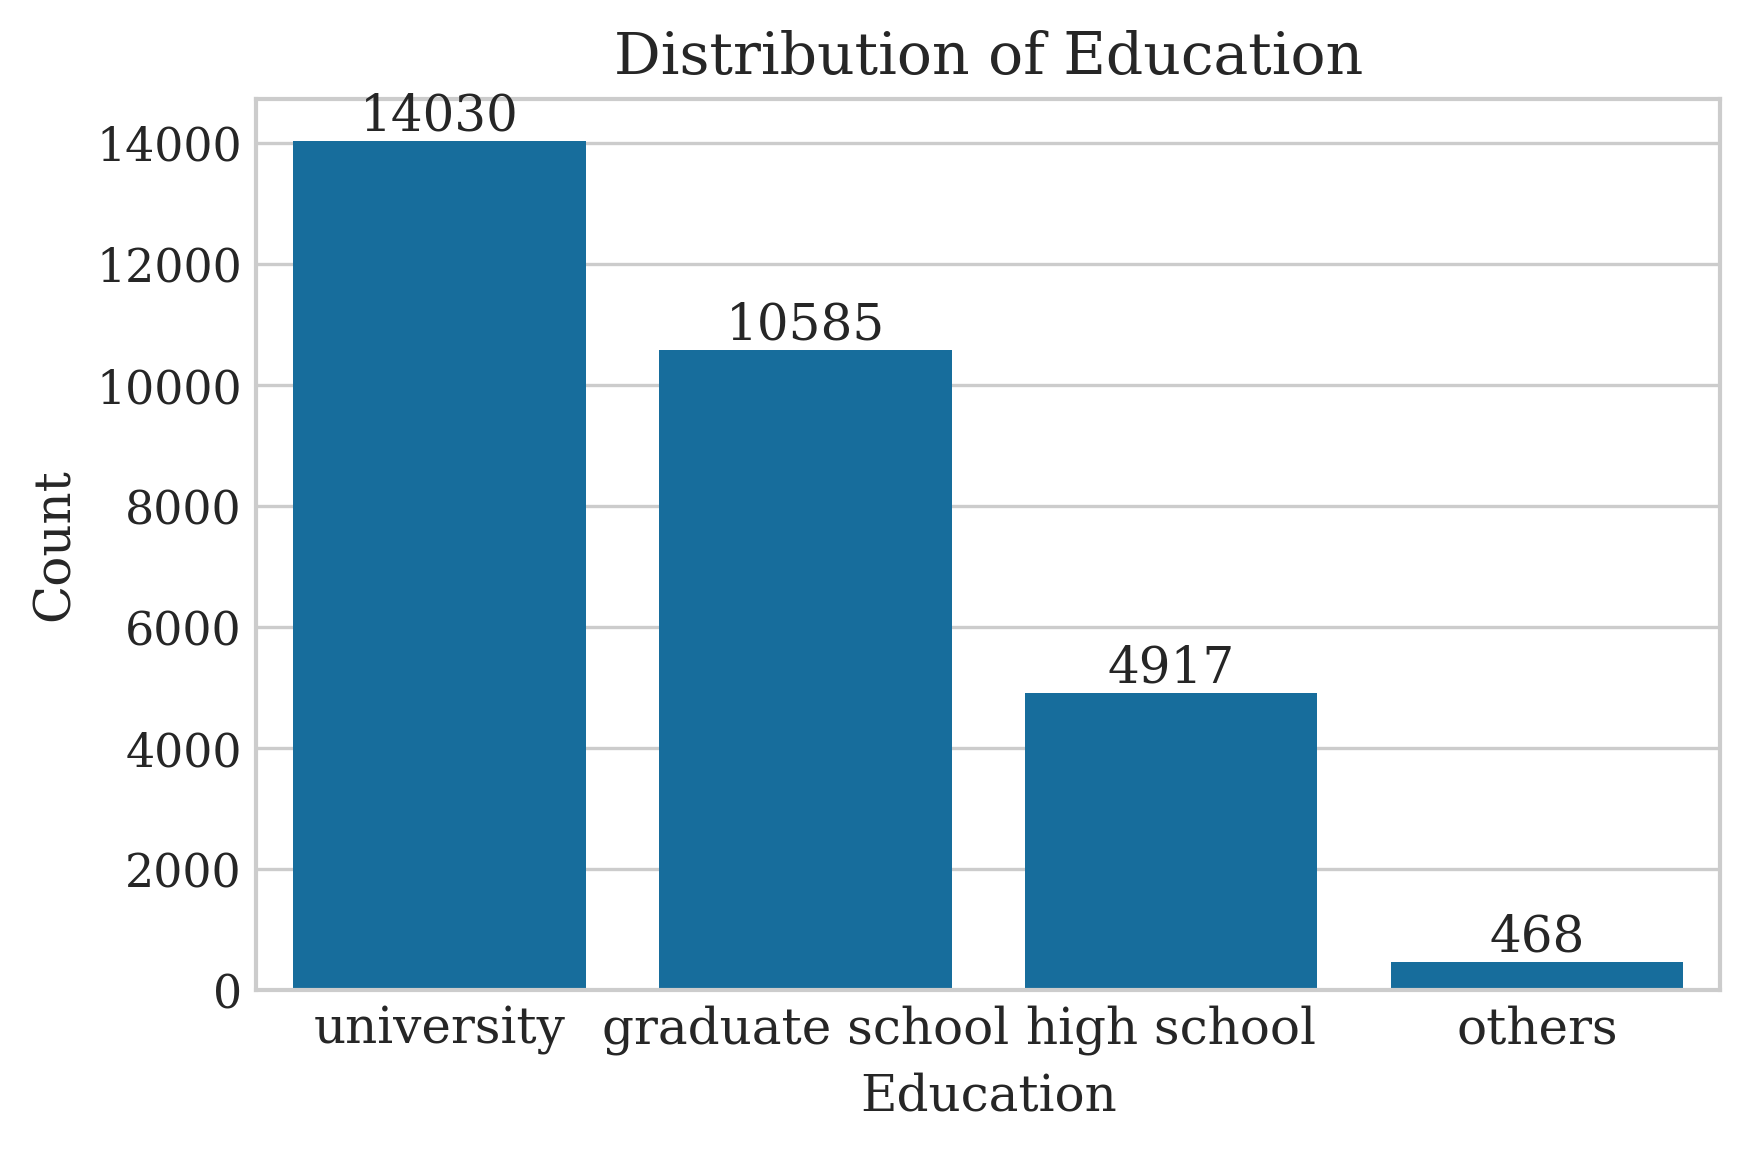

In [ ]:
# check src\plotting\exploratory_data_analysis.py for source code

Image(r"..\reports\EDA\education.png",width=600)

In [ ]:

# distribution of consumers by education
Figure 3. Distribution of Consumers by Marital Status
Figure 4. Distribution of Consumers by Marital and Default Status
Figure 5. Distribution of Consumers by Age Category and Default Status
Figure 6. Distribution of Credit Amount by Marital Status
Figure 7. Distribution of Credit Amount by Default Status
Figure 8. Distribution of Credit Amount by Education and Default Status
Figure 9. Distribution of Payment Delays in August 

In [ ]:
reports\EDA\april_delay.png

![figure 1](notebooks/reports/EDA/education.png)

![my image](C:/Users/banji/creditCard_default_risk/reports/EDA/age.png)



<p style= 'text-align: justify;'>
An EDA of the dataset revealed that consumers with a university degree accounted for 47% of the data by education level, while single individuals accounted for 53% of consumers by marital status, with 60% of females comprising the consumer base, as illustrated in Figures 2, 3, and 4 respectively.
</p>
 
Figure 2. Distribution of Consumers by Education

 
Figure 3. Distribution of Consumers by Marital Status

 
Figure 4. Distribution of Consumers by Marital and Default Status

While this might be due to the data imbalance in favour of non-defaulters, non-defaulters generally borrowed higher amounts than defaulters—a trend which is consistent across consumers by age group, marital status, and education as shown in Figures 6-8. 
 
Figure 5. Distribution of Consumers by Age Category and Default Status

 
Figure 6. Distribution of Credit Amount by Marital Status

Despite accounting for just 35% of the consumer base, consumers with a graduate degree borrowed higher amounts than those with a university education (46%). Similarly, married consumers, particularly females, borrowed higher amounts. 
 
Figure 7. Distribution of Credit Amount by Default Status

For delay in payments, August had the highest number of consumers paying their full bills, as illustrated in Figure 9, followed by July, with May having the lowest (See Appendix D).
 
Figure 8. Distribution of Credit Amount by Education and Default Status

 
Figure 9. Distribution of Payment Delays in August 